# Into

The purpos of the nesdis_gml_synergy package is to collect all the data processing that is done on the NESDIS satellite products in the context of the NESDIS-GML-synergy project. The package provide functions for opening satellite data files and generating instances that contain usefull methods that are either common to all satellite products, e.g. plotting, finding datapoints closes or around sites,etc. Other instances provide methods tailored to the particular data product, e.g. plot_true_color for the MCMIP product.

You will notice that I make use of the atmPy library below. This is not necessary but can be quite convenient.

# Downloading data

Downloading data is done using the nesdis_aws library, for details check out https://github.com/hagne/nesdis_aws (there is a similar example notebook like this one). There are examples below of the general usage of nesdis_aws.

# Imports

In [3]:
import pathlib as pl
import nesdis_aws
import nesdis_gml_synergy.satlab as ngs
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as surfrad
import os
os.getpid()

18559

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# warnings.filterwarnings("default")

In [4]:
plt.rcParams['figure.dpi'] = 200

# Project satellite product onto surface site

In [58]:
reload(ngs)

<module 'nesdis_gml_synergy.satlab' from '/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py'>

In [59]:
pp = ngs.ProjectionProject(surfrad.network.stations,
                            path2folder_raw='/mnt/telg/data/smoke_events/20200912_18_CO/goes_raw/ABI_L2_AODC_M6_G17/',
                            path2interfld='/mnt/telg/tmp/class_tmp_inter',
                            path2resultfld='/mnt/telg/data/smoke_events/20200912_18_CO/goes_projected/ABI_L2_AODC_M6_G17/',
                            generate_missing_folders=True,)

# i=(12*24 * 3) + (12 * 14)
# di = 10
# pp.workplan = pp.workplan.iloc[i:i+di]

In [60]:
pp.workplan

Empty DataFrame
Columns: [path2tempfile, path2intermediate_file_point, path2intermediate_file_area, product_name, satellite, datetime_start, datetime_end, path2result_point, path2result_area, result_exists, intermediate_exists]
Index: []

In [57]:
pp.process(no_of_cpu=5)

## concatinate projected data

In [61]:
cc = ngs.Concatonator(path2scraped_files='/mnt/telg/tmp/class_tmp_inter/area/',
                      path2concat_files='/mnt/telg/data/smoke_events/20200912_18_CO/goes_projected/ABI_L2_AODC_M6_G17/area/',
                      test = False)

In [62]:
cc.save()

In [63]:
cc = ngs.Concatonator(path2scraped_files='/mnt/telg/tmp/class_tmp_inter/point/',
                      path2concat_files='/mnt/telg/data/smoke_events/20200912_18_CO/goes_projected/ABI_L2_AODC_M6_G17/point/',
                      test = False)

In [64]:
cc.save()

# Products

## Land surface temperatur

land surface temperature product ('ABI-L2-LST') has a time resolution of 1 houre and a spacial resolution of: ~3.5x2.5 km (depending on location ... see below)

### download some data

In [144]:
reload(nesdis_aws.nesdis_aws)
reload(nesdis_aws)

<module 'nesdis_aws' from '/mnt/telg/prog/nesdis_aws/nesdis_aws/__init__.py'>

In [138]:
query = nesdis_aws.AwsQuery(path2folder_local='/mnt/telg/data/smoke_events/20200912_18_CO/goes_raw/ABI_L2_LST/',
                            satellite='16',
                            product='ABI-L2-LST',
                            scan_sector='C',
                            start='2020-09-30 12:00:00',
                            end='2020-09-30 13:00:00',
                            no_of_days=None,
                            last_x_days=None,
                            max_no_of_files=100)

In [139]:
print(query.info_on_current_query())

no of files: 1
estimated disk usage: 2 mb
remaining disk space after download: 48 %



In [140]:
query.download()


[None]

### open

In [ ]:
from importlib import reload

In [8]:
lst = ngs.open_file('/mnt/telg/data/smoke_events/20200912_18_CO/goes_raw/ABI_L2_LST/OR_ABI-L2-LSTC-M6_G16_s20202741201163_e20202741203536_c20202741204383.nc')

In [9]:
lst.ds

<xarray.Dataset>
Dimensions:                                 (number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 2500, y: 1500)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.1013 ... 0.03861
    y_image                                 float32 ...
    x_image                                 float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    solar_zenith_angle                      float32 ...
Dimensions without coordinates: number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/25)
    LST                                     (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 ...
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    standard_deviation_lst                  float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-09-30T12:01:16.3Z
    time_coverage_end:         2020-09-30T12:03:53.6Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        37ad05fe-7d72-4e76-b68c-a871f793d01f

In [11]:
lon, lat = lst.lonlat

In [14]:
lst.ds = lst.ds.assign_coords({'latitude':(['y','x'], lat),
                     'longitude':(['y','x'], lon)})
lst.ds 

<xarray.Dataset>
Dimensions:                                 (number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 2500, y: 1500)
Coordinates:
    t                                       datetime64[ns] 2020-09-30T12:02:3...
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.1013 ... 0.03861
    y_image                                 float32 0.08624
    x_image                                 float32 -0.03136
    retrieval_local_zenith_angle            float32 85.0
    quantitative_local_zenith_angle         float32 70.0
    solar_zenith_angle                      float32 180.0
    latitude                                (y, x) float64 57.0 57.0 ... 14.64
    longitude                               (y, x) float64 -152.0 ... -61.91
Dimensions without coordinates: number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/25)
    LST                                     (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 -2147483647
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    standard_deviation_lst                  float64 5.838
    algorithm_dynamic_input_data_container  int32 -2147483647
    processing_parm_version_container       int32 -2147483647
    algorithm_product_version_container     int32 -2147483647
    percent_uncorrectable_GRB_errors        float64 0.0
    percent_uncorrectable_L0_errors         float64 0.0
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-09-30T12:01:16.3Z
    time_coverage_end:         2020-09-30T12:03:53.6Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        37ad05fe-7d72-4e76-b68c-a871f793d01f

In [12]:
lst.ds.assign_coords({'latitude':(['x','y'], lat),
                     'longitude':(['x','y'], lon)})

ValueError: conflicting sizes for dimension 'x': length 1500 on 'latitude' and length 2500 on {'y': 'LST', 'x': 'LST', 'number_of_time_bounds': 'time_bounds', 'number_of_image_bounds': 'y_image_bounds', 'number_of_LZA_bounds': 'retrieval_local_zenith_angle_bounds', 'number_of_SZA_bounds': 'solar_zenith_angle_bounds'}

### Plot on map

/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:472: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  bmap.pcolormesh(lons, lats, self.ds[variable], latlon=True, **pcolor_kwargs)


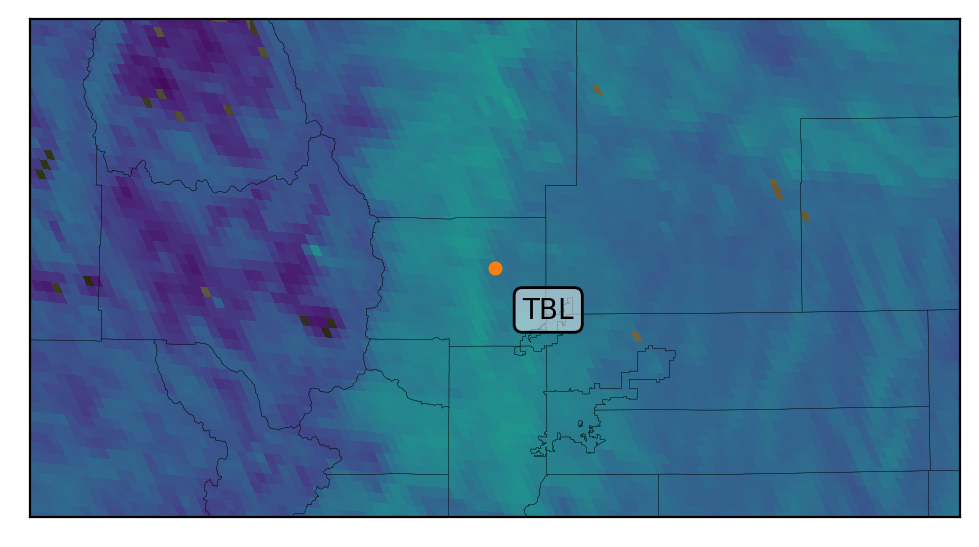

In [303]:
scale = 0.1
width=2800000 *scale
height=1500000 * scale
a, bmap = surfrad.network.stations.Table_Mountain.plot(width=width, height=height)
lst.plot('LST', bmap = bmap)
bmap.drawcounties()

## ABI-L1b-RadC - Advanced Baseline Imager Level 1b CONUS

### download some data

In [144]:
reload(nesdis_aws.nesdis_aws)
reload(nesdis_aws)

<module 'nesdis_aws' from '/mnt/telg/prog/nesdis_aws/nesdis_aws/__init__.py'>

In [138]:
query = nesdis_aws.AwsQuery(path2folder_local='/mnt/telg/data/smoke_events/20200912_18_CO/goes_raw/ABI_L1b_Rad/',
                            satellite='16',
                            product='ABI-L2-LST',
                            scan_sector='C',
                            start='2020-09-30 12:00:00',
                            end='2020-09-30 13:00:00',
                            no_of_days=None,
                            last_x_days=None,
                            max_no_of_files=100)

In [139]:
print(query.info_on_current_query())

no of files: 1
estimated disk usage: 2 mb
remaining disk space after download: 48 %



In [140]:
query.download()


[None]

### open

In [ ]:
from importlib import reload

In [8]:
lst = ngs.open_file('/mnt/telg/data/smoke_events/20200912_18_CO/goes_raw/ABI_L2_LST/OR_ABI-L2-LSTC-M6_G16_s20202741201163_e20202741203536_c20202741204383.nc')

In [9]:
lst.ds

<xarray.Dataset>
Dimensions:                                 (number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 2500, y: 1500)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.1013 ... 0.03861
    y_image                                 float32 ...
    x_image                                 float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    solar_zenith_angle                      float32 ...
Dimensions without coordinates: number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/25)
    LST                                     (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 ...
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    standard_deviation_lst                  float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-09-30T12:01:16.3Z
    time_coverage_end:         2020-09-30T12:03:53.6Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        37ad05fe-7d72-4e76-b68c-a871f793d01f

In [11]:
lon, lat = lst.lonlat

In [14]:
lst.ds = lst.ds.assign_coords({'latitude':(['y','x'], lat),
                     'longitude':(['y','x'], lon)})
lst.ds 

<xarray.Dataset>
Dimensions:                                 (number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 2500, y: 1500)
Coordinates:
    t                                       datetime64[ns] 2020-09-30T12:02:3...
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.1013 ... 0.03861
    y_image                                 float32 0.08624
    x_image                                 float32 -0.03136
    retrieval_local_zenith_angle            float32 85.0
    quantitative_local_zenith_angle         float32 70.0
    solar_zenith_angle                      float32 180.0
    latitude                                (y, x) float64 57.0 57.0 ... 14.64
    longitude                               (y, x) float64 -152.0 ... -61.91
Dimensions without coordinates: number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/25)
    LST                                     (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 -2147483647
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    standard_deviation_lst                  float64 5.838
    algorithm_dynamic_input_data_container  int32 -2147483647
    processing_parm_version_container       int32 -2147483647
    algorithm_product_version_container     int32 -2147483647
    percent_uncorrectable_GRB_errors        float64 0.0
    percent_uncorrectable_L0_errors         float64 0.0
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-09-30T12:01:16.3Z
    time_coverage_end:         2020-09-30T12:03:53.6Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        37ad05fe-7d72-4e76-b68c-a871f793d01f

In [12]:
lst.ds.assign_coords({'latitude':(['x','y'], lat),
                     'longitude':(['x','y'], lon)})

ValueError: conflicting sizes for dimension 'x': length 1500 on 'latitude' and length 2500 on {'y': 'LST', 'x': 'LST', 'number_of_time_bounds': 'time_bounds', 'number_of_image_bounds': 'y_image_bounds', 'number_of_LZA_bounds': 'retrieval_local_zenith_angle_bounds', 'number_of_SZA_bounds': 'solar_zenith_angle_bounds'}

### Plot on map

/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:472: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  bmap.pcolormesh(lons, lats, self.ds[variable], latlon=True, **pcolor_kwargs)


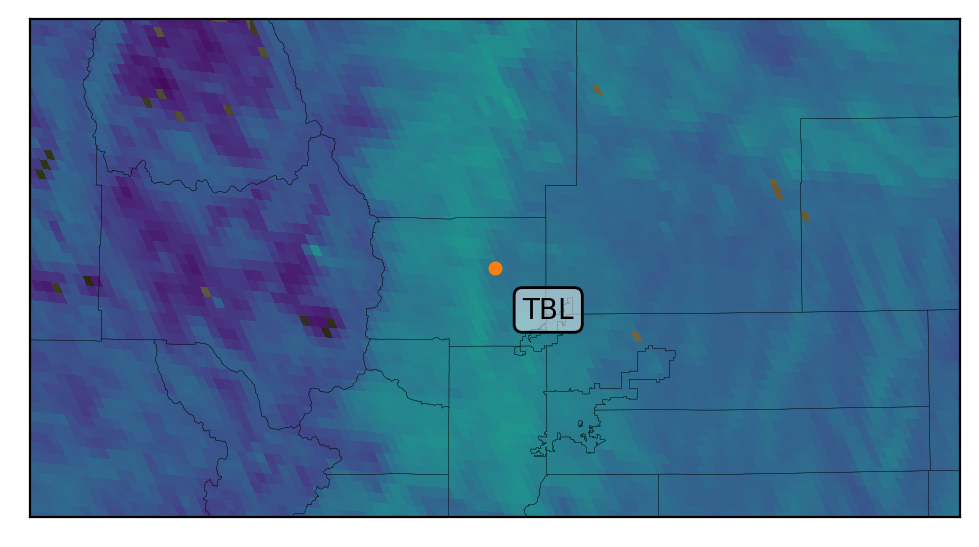

In [303]:
scale = 0.1
width=2800000 *scale
height=1500000 * scale
a, bmap = surfrad.network.stations.Table_Mountain.plot(width=width, height=height)
lst.plot('LST', bmap = bmap)
bmap.drawcounties()

## Advanced Baseline Imager Level 2 Cloud and Moisture Imagery CONUS

In [ ]:
ABI-L2-CMIPC - Advanced Baseline Imager Level 2 Cloud and Moisture Imagery CONUS

### download some data

In [144]:
reload(nesdis_aws.nesdis_aws)
reload(nesdis_aws)

<module 'nesdis_aws' from '/mnt/telg/prog/nesdis_aws/nesdis_aws/__init__.py'>

In [70]:
query = nesdis_aws.AwsQuery(path2folder_local='/mnt/telg/data/nesdis/goes/ABI_L2_CMIP',
                            satellite='17',
                            product='ABI-L2-CMIP',
                            scan_sector='C',
                            start='2021-07-20 12:00:00',
                            end='2021-07-20 23:59:00',
                            no_of_days=None,
                            last_x_days=None,
                            max_no_of_files=100)

In [71]:
print(query.info_on_current_query())

no of files: 2304
estimated disk usage: 11253 mb
remaining disk space after download: 50 %



In [72]:
query.download()


[None]

### open

In [1]:
import pathlib as pl
import nesdis_aws
import nesdis_gml_synergy.satlab as ngs
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as surfrad
import os
os.getpid()

8474

In [2]:
import  cartopy.crs as ccrs
import cartopy.feature as cf

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from importlib import reload

In [5]:
xc,yc = -121.2 + 0.2, 40.05 + 0.8
dx = dy = 1.5
extent = [xc-dx, xc + dx, yc - dy, yc + dy]

In [6]:
# cmip = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_CMIP/OR_ABI-L2-CMIPC-M6C01_G16_s20212011701197_e20212011703570_c20212011704032.nc')
# cmip = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_CMIP/OR_ABI-L2-CMIPC-M6C02_G16_s20212011701197_e20212011703570_c20212011704065.nc')
cmip16 = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_CMIP/OR_ABI-L2-CMIPC-M6C02_G16_s20212012301197_e20212012303570_c20212012304085.nc', extent = extent)

In [7]:
cmip17 = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_CMIP/OR_ABI-L2-CMIPC-M6C02_G17_s20212012301177_e20212012303550_c20212012304035.nc', extent = extent)

In [23]:
# cmip = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_CMIP/OR_ABI-L2-CMIPC-M6C02_G16_s20212011701197_e20212011703570_c20212011704065.nc')
# cmip = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_CMIP/OR_ABI-L2-CMIPC-M6C02_G16_s20212011701197_e20212011703570_c20212011704065.nc')
# cmip = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_CMIP/OR_ABI-L2-CMIPC-M6C02_G16_s20212011701197_e20212011703570_c20212011704065.nc')
# cmip = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_CMIP/OR_ABI-L2-CMIPC-M6C02_G16_s20212011701197_e20212011703570_c20212011704065.nc')z

In [24]:
cmip = cmip16

In [44]:
def plotcmip(cmip):
    cmip.lonlat

    proj = ccrs.Geostationary(
    central_longitude=cmip.ds.goes_imager_projection.longitude_of_projection_origin,
    satellite_height=cmip.ds.goes_imager_projection.perspective_point_height,)
    a = plt.subplot(projection=proj, )
#     a.coastlines(resolution='110m')
#     a.add_feature(cf.STATES)
    # pc = a.pcolormesh(lon, lat, cmip.ds.CMI, transform = ccrs.PlateCarree())
    pc = a.pcolormesh(cmip.ds.lon, cmip.ds.lat, cmip.ds.CMI, transform = ccrs.PlateCarree())
    a.set_axis_off()
    f = a.get_figure()
    return f,a, pc
# a.set_extent((-3902552.470991925, 1646436.260848383, 1424334.960996849, 4739907.277320488))
# a.set_extend()

# a.set_xlim(left =0)
# a.set_ylim(bottom =0)

# xc,yc = -121.2, 40.05
# dx = dy = 1
# a.set_extent([xc-dx, xc + dx, yc-dy, yc+dy], crs = ccrs.PlateCarree())
# a16 = a
# pc16 = pc

In [45]:
xc,yc = -121.2 + 0.1, 40.05 + 0.1
dx = dy = 0.4
extent = [xc-dx, xc + dx, yc - dy, yc + dy]
clim= (0.02, 0.4)

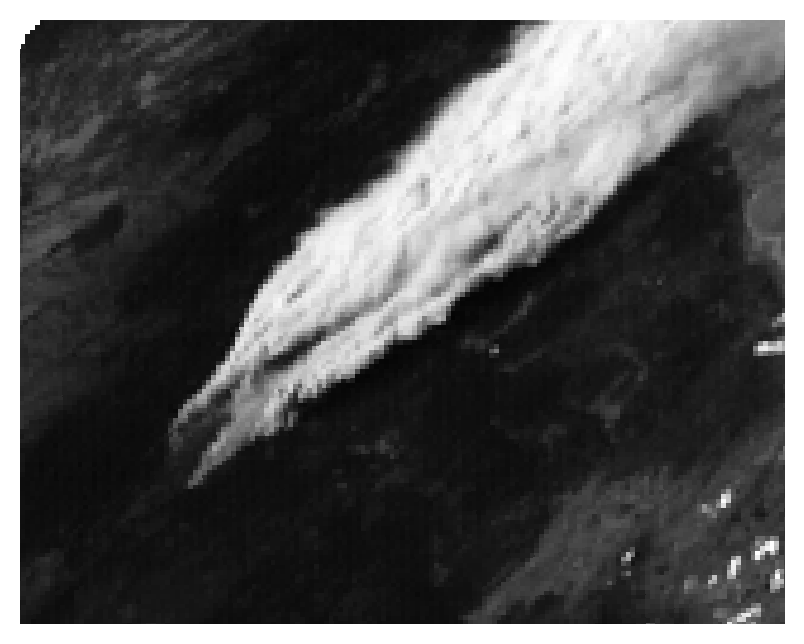

In [46]:
f, a_16,pc_16 = plotcmip(cmip16)
a_16.set_extent(extent, crs = ccrs.PlateCarree())
pc_16.set_cmap(plt.cm.Greys_r)
pc_16.set_clim(clim)
f.savefig('plume_16.png', bbox_inches = 'tight')

ModuleNotFoundError: No module named 'cv2'

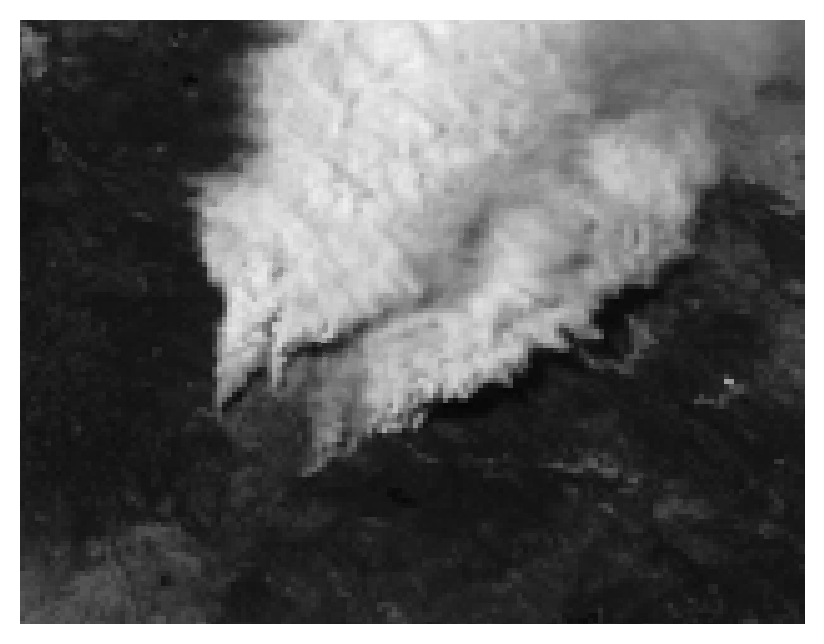

In [47]:
f, a_17,pc_17 = plotcmip(cmip17)
pc_17.set_cmap(plt.cm.Greys_r)
pc_17.set_clim(clim)
a_17.set_extent(extent, crs = ccrs.PlateCarree())
f.savefig('plume_17.png', bbox_inches = 'tight')

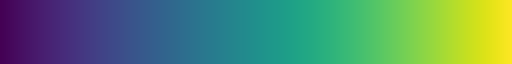

In [39]:
pc_17.get_cmap()

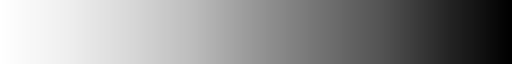

In [41]:
plt.cm.Greys

In [8]:
lon, lat = cmip.lonlat

where_lon = np.logical_and(lon > xc - dx, lon < xc + dx)
where_lat = np.logical_and(lat > yc - dy, lat < yc + dy)
where = np.logical_and(where_lat, where_lon)

cmip.ds['lon'] = xr.DataArray(lon, dims = ['y', 'x'])
cmip.ds['lat'] = xr.DataArray(lat, dims = ['y', 'x'])

cmip.ds['where_cond'] = xr.DataArray(where, dims = ['y', 'x'])





ds_sel = cmip.ds.where(cmip.ds.where_cond)

ds_sel = ds_sel.dropna('x', how = 'all')

ds_sel = ds_sel.dropna('y', how = 'all')

ds_sel

In [43]:
def cutit(cmip, variable, where):
    sel = cmip.ds[variable].where(where)
    sel = sel.dropna('x', how = 'all')
    sel = sel.dropna('y', how = 'all')
    return sel

In [45]:
sel_CMI = cutit(cmip, 'CMI', where)
sel_lon = cutit(cmip, 'lon', where)
sel_lat = cutit(cmip, 'lat', where)

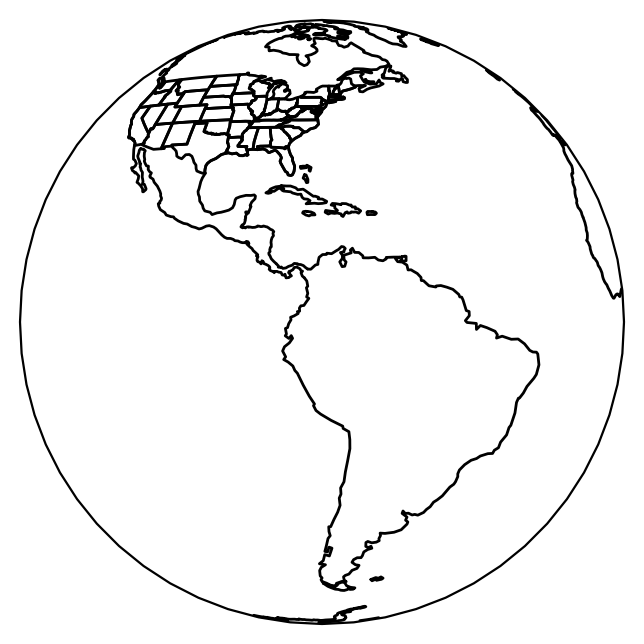

In [28]:
# lon, lat = cmip.lonlat

proj = ccrs.Geostationary(
    central_longitude=cmip.ds.goes_imager_projection.longitude_of_projection_origin,
    satellite_height=cmip.ds.goes_imager_projection.perspective_point_height,)
a = plt.subplot(projection=proj, )
a.coastlines(resolution='110m')
a.add_feature(cf.STATES)
# pc = a.pcolormesh(lon, lat, cmip.ds.CMI, transform = ccrs.PlateCarree())
pc = a.pcolormesh(lon, lat, sel, transform = ccrs.PlateCarree())

# a.set_extent((-3902552.470991925, 1646436.260848383, 1424334.960996849, 4739907.277320488))
# a.set_extend()

# a.set_xlim(left =0)
# a.set_ylim(bottom =0)

# xc,yc = -121.2, 40.05
# dx = dy = 1
# a.set_extent([xc-dx, xc + dx, yc-dy, yc+dy], crs = ccrs.PlateCarree())
# a16 = a
# pc16 = pc

In [8]:
def plotcimip(cmip, center = (-121.2, 40.05), extend = 1):
    xc,yc = center
    dx = dy = extend
    lon, lat = cmip.lonlat

    proj = ccrs.Geostationary(
        central_longitude=cmip.ds.goes_imager_projection.longitude_of_projection_origin,
        satellite_height=cmip.ds.goes_imager_projection.perspective_point_height,)
    a = plt.subplot(projection=proj, )
    a.coastlines(resolution='110m')
    a.add_feature(cf.STATES)
    pc = a.pcolormesh(lon, lat, cmip.ds.CMI, transform = ccrs.PlateCarree())
    # a.set_extent((-3902552.470991925, 1646436.260848383, 1424334.960996849, 4739907.277320488))
    # a.set_extend()

    # a.set_xlim(left =0)
    # a.set_ylim(bottom =0)

#     xc,yc = -121.2, 40.05
#     dx = dy = 1
    a.set_extent([xc-dx, xc + dx, yc-dy, yc+dy], crs = ccrs.PlateCarree())
    return a,pc

In [ ]:
a,pc = plotcimip(cmip)

In [ ]:
lon, lat = cmip.lonlat

proj = ccrs.Geostationary(
    central_longitude=cmip.ds.goes_imager_projection.longitude_of_projection_origin,
    satellite_height=cmip.ds.goes_imager_projection.perspective_point_height,)
a = plt.subplot(projection=proj, )
a.coastlines(resolution='110m')
a.add_feature(cf.STATES)
pc = a.pcolormesh(lon, lat, cmip.ds.CMI, transform = ccrs.PlateCarree())
# a.set_extent((-3902552.470991925, 1646436.260848383, 1424334.960996849, 4739907.277320488))
# a.set_extend()

# a.set_xlim(left =0)
# a.set_ylim(bottom =0)

xc,yc = -121.2, 40.05
dx = dy = 1
a.set_extent([xc-dx, xc + dx, yc-dy, yc+dy], crs = ccrs.PlateCarree())
a16 = a
pc16 = pc

In [82]:
lon, lat = cmip17.lonlat

In [ ]:
proj = ccrs.Geostationary(
    central_longitude=cmip17.ds.goes_imager_projection.longitude_of_projection_origin,
    satellite_height=cmip17.ds.goes_imager_projection.perspective_point_height,)
a = plt.subplot(projection=proj, )
a.coastlines(resolution='110m')
a.add_feature(cf.STATES)
pc = a.pcolormesh(lon, lat, cmip17.ds.CMI, transform = ccrs.PlateCarree())
# a.set_extent((-3902552.470991925, 1646436.260848383, 1424334.960996849, 4739907.277320488))
# a.set_extend()

# a.set_xlim(left =0)
# a.set_ylim(bottom =0)

a.set_extent([xc-dx, xc + dx, yc-dy, yc+dy], crs = ccrs.PlateCarree())
a16 = a
pc16 = pc

In [47]:
a.set_extent((-3902552.470991925, 1646436.260848383, 1424334.960996849, 4739907.277320488))

(-3902552.470991925, 1646436.260848383, 1424334.960996849, 4739907.277320488)

In [11]:
lon, lat = lst.lonlat

In [14]:
lst.ds = lst.ds.assign_coords({'latitude':(['y','x'], lat),
                     'longitude':(['y','x'], lon)})
lst.ds 

<xarray.Dataset>
Dimensions:                                 (number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 2500, y: 1500)
Coordinates:
    t                                       datetime64[ns] 2020-09-30T12:02:3...
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.1013 ... 0.03861
    y_image                                 float32 0.08624
    x_image                                 float32 -0.03136
    retrieval_local_zenith_angle            float32 85.0
    quantitative_local_zenith_angle         float32 70.0
    solar_zenith_angle                      float32 180.0
    latitude                                (y, x) float64 57.0 57.0 ... 14.64
    longitude                               (y, x) float64 -152.0 ... -61.91
Dimensions without coordinates: number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/25)
    LST                                     (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 -2147483647
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    standard_deviation_lst                  float64 5.838
    algorithm_dynamic_input_data_container  int32 -2147483647
    processing_parm_version_container       int32 -2147483647
    algorithm_product_version_container     int32 -2147483647
    percent_uncorrectable_GRB_errors        float64 0.0
    percent_uncorrectable_L0_errors         float64 0.0
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-09-30T12:01:16.3Z
    time_coverage_end:         2020-09-30T12:03:53.6Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        37ad05fe-7d72-4e76-b68c-a871f793d01f

In [12]:
lst.ds.assign_coords({'latitude':(['x','y'], lat),
                     'longitude':(['x','y'], lon)})

ValueError: conflicting sizes for dimension 'x': length 1500 on 'latitude' and length 2500 on {'y': 'LST', 'x': 'LST', 'number_of_time_bounds': 'time_bounds', 'number_of_image_bounds': 'y_image_bounds', 'number_of_LZA_bounds': 'retrieval_local_zenith_angle_bounds', 'number_of_SZA_bounds': 'solar_zenith_angle_bounds'}

### Plot on map

/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:472: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  bmap.pcolormesh(lons, lats, self.ds[variable], latlon=True, **pcolor_kwargs)


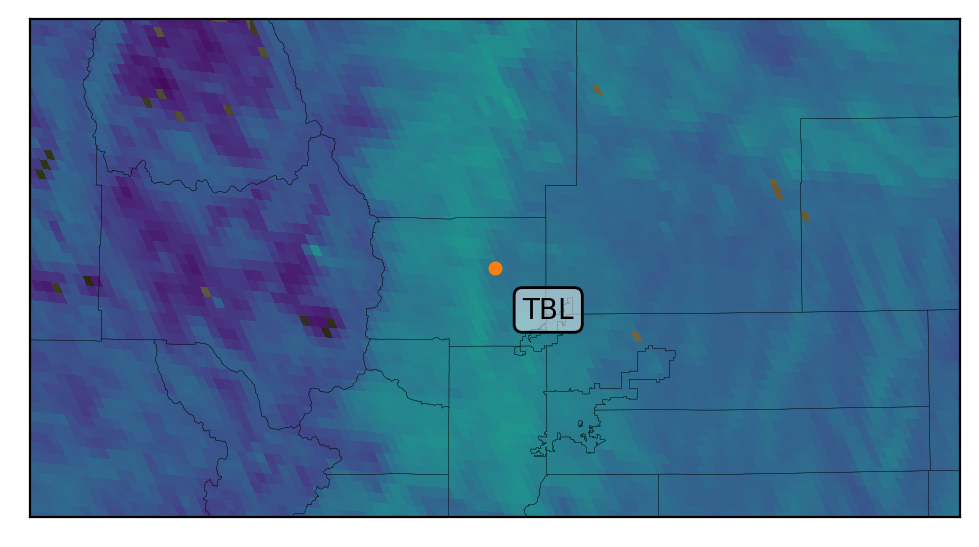

In [303]:
scale = 0.1
width=2800000 *scale
height=1500000 * scale
a, bmap = surfrad.network.stations.Table_Mountain.plot(width=width, height=height)
lst.plot('LST', bmap = bmap)
bmap.drawcounties()

## Cloud and Moisture Imagery (MCMIP)

so far I am using this product to make pretty pictures. BTW, there is a SatelliteMovie class in this package to make dayly movies. Will add it to this notebook at some point ... if you are really eager to see how it works, bug me 

### open

In [343]:
reload(ngs)

<module 'nesdis_gml_synergy.satlab' from '/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py'>

In [15]:
mcmip = ngs.open_file('/mnt/telg/data/smoke_events/20200912_18_CO/goes_raw/ABI-L2-MCMIP/OR_ABI-L2-MCMIPC-M6_G16_s20202561501157_e20202561503536_c20202561504090.nc')

In [16]:
mcmip.ds

<xarray.Dataset>
Dimensions:                                 (band: 1, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 2500, y: 1500)
Coordinates: (12/37)
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.1013 ... 0.03861
    y_image                                 float32 ...
    x_image                                 float32 ...
    band_wavelength_C01                     (band) float32 ...
    ...                                      ...
    band_id_C11                             (band) int8 ...
    band_id_C12                             (band) int8 ...
    band_id_C13                             (band) int8 ...
    band_id_C14                             (band) int8 ...
    band_id_C15                             (band) int8 ...
    band_id_C16                             (band) int8 ...
Dimensions without coordinates: band, number_of_image_bounds, number_of_time_bounds
Data variables: (12/124)
    CMI_C01                                 (y, x) float32 ...
    DQF_C01                                 (y, x) float32 ...
    CMI_C02                                 (y, x) float32 ...
    DQF_C02                                 (y, x) float32 ...
    CMI_C03                                 (y, x) float32 ...
    DQF_C03                                 (y, x) float32 ...
    ...                                      ...
    mean_brightness_temperature_C16         float32 ...
    std_dev_brightness_temperature_C16      float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    dynamic_algorithm_input_data_container  int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    date_created:              2020-09-12T15:04:09.0Z
    time_coverage_start:       2020-09-12T15:01:15.7Z
    time_coverage_end:         2020-09-12T15:03:53.6Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        a6231cc9-e1ee-4192-a421-ef9c0be1fc24

{}

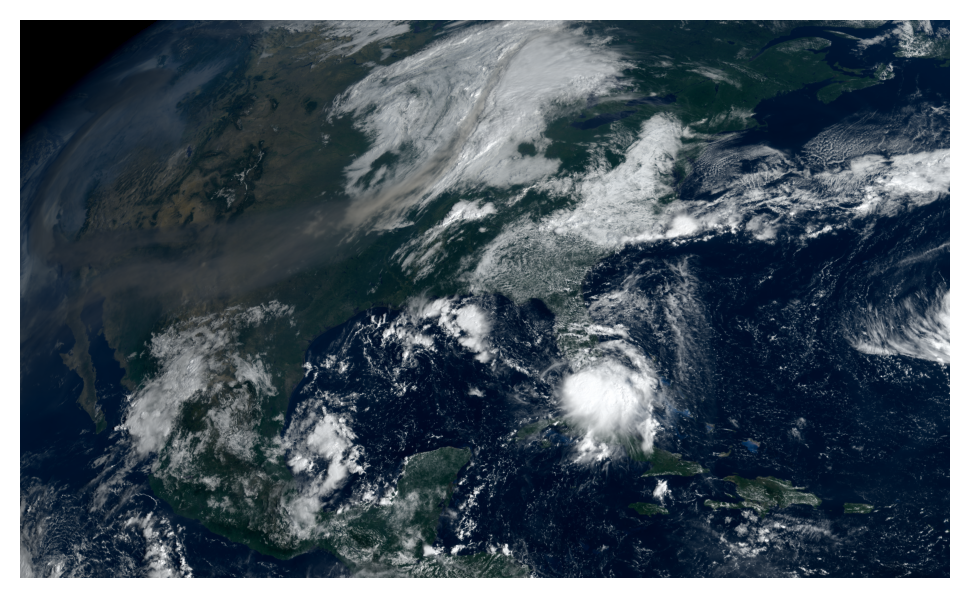

In [345]:
mcmip.plot_true_color()

/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:560: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  out['pc'] = pc


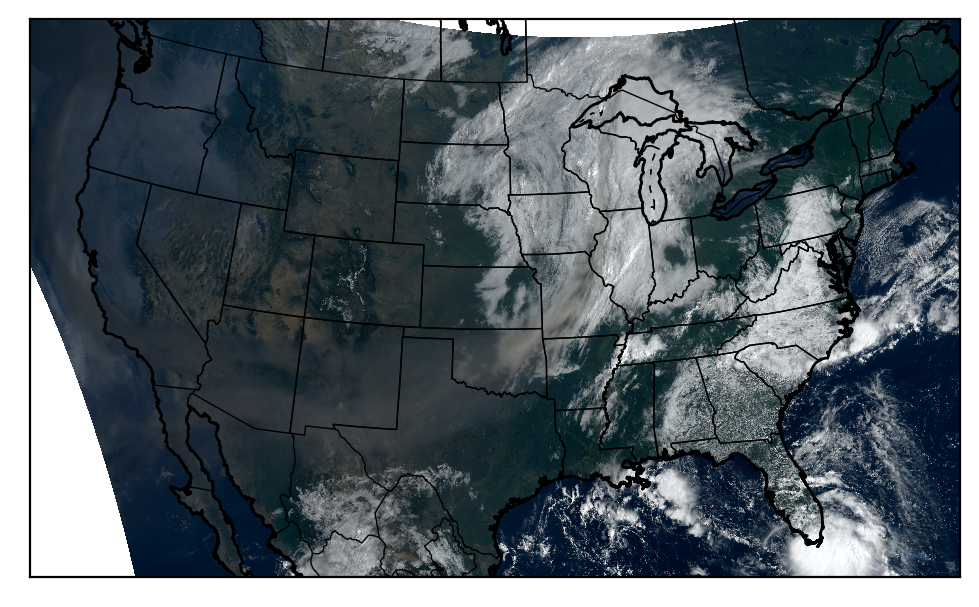

In [346]:
out = mcmip.plot_true_color(projection='aea', 
#                       bmap = bmap, 
                      zorder = 0)

### resolution

In [305]:
lst.get_resolution(surfrad.network.stations.Table_Mountain)

lon      lat
0  3.452556  2.67319

## AOD

In [89]:
p2f = pl.Path('/mnt/telg/data/smoke_events/20200912_18_CO/goes_raw/ABI_L2_AODC_M6_G16/OR_ABI-L2-AODC-M6_G16_s20202571501154_e20202571503527_c20202571506226.nc')
sat_aod = ngs.open_class_file(p2f)

In [90]:
sat_aod.ds

<xarray.Dataset>
Dimensions:                                                 (land_sensor_bands: 3, latitude_bands: 18, num_area_types: 2, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_latitude_band_bounds: 2, number_of_sunglint_angle_bounds: 2, number_of_time_bounds: 2, sea_sensor_bands: 4, x: 2500, y: 1500)
Coordinates:
    t                                                       datetime64[ns] ...
  * y                                                       (y) float32 0.128...
  * x                                                       (x) float32 -0.10...
    y_image                                                 float32 ...
    x_image                                                 float32 ...
    sunglint_angle                                          float32 ...
    retrieval_local_zenith_angle                            float32 ...
    quantitative_local_zenith_angle                         float32 ...
    retrieval_solar_zenith_angle                            float32 ...
    quantitative_solar_zenith_angle                         float32 ...
    aod_product_wavelength                                  float32 ...
  * latitude_bands                                          (latitude_bands) float32 ...
Dimensions without coordinates: land_sensor_bands, num_area_types, number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_latitude_band_bounds, number_of_sunglint_angle_bounds, number_of_time_bounds, sea_sensor_bands
Data variables:
    AOD                                                     (y, x) float32 ...
    DQF                                                     (y, x) float32 ...
    AE1                                                     (y, x) float32 ...
    AE2                                                     (y, x) float32 ...
    AE_DQF                                                  (y, x) float32 ...
    time_bounds                                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                                  int32 ...
    y_image_bounds                                          (number_of_image_bounds) float32 ...
    x_image_bounds                                          (number_of_image_bounds) float32 ...
    nominal_satellite_subpoint_lat                          float32 ...
    nominal_satellite_subpoint_lon                          float32 ...
    nominal_satellite_height                                float32 ...
    geospatial_lat_lon_extent                               float32 ...
    sunglint_angle_bounds                                   (number_of_sunglint_angle_bounds) float32 ...
    retrieval_local_zenith_angle_bounds                     (number_of_LZA_bounds) float32 ...
    quantitative_local_zenith_angle_bounds                  (number_of_LZA_bounds) float32 ...
    retrieval_solar_zenith_angle_bounds                     (number_of_SZA_bounds) float32 ...
    quantitative_solar_zenith_angle_bounds                  (number_of_SZA_bounds) float32 ...
    land_sensor_band_wavelengths                            (land_sensor_bands) float32 ...
    sea_sensor_band_wavelengths                             (sea_sensor_bands) float32 ...
    land_sensor_band_ids                                    (land_sensor_bands) uint8 ...
    sea_sensor_band_ids                                     (sea_sensor_bands) uint8 ...
    latitude_band_bounds                                    (latitude_bands, number_of_latitude_band_bounds) float32 ...
    snow_free_land_and_ice_free_sea                         (num_area_types) |S14 ...
    goes_lat_lon_projection                                 int32 ...
    aod550_retrievals_attempted_land                        float64 ...
    aod550_retrievals_attempted_sea                         float64 ...
    aod550_good_LZA_retrievals_attempted                    float64 ...
    aod550_outlier_pixel_count                              float64 ...
    min_ao

/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:408: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  bmap.pcolormesh(lons, lats, self.ds[param], latlon=True, zorder = 0)


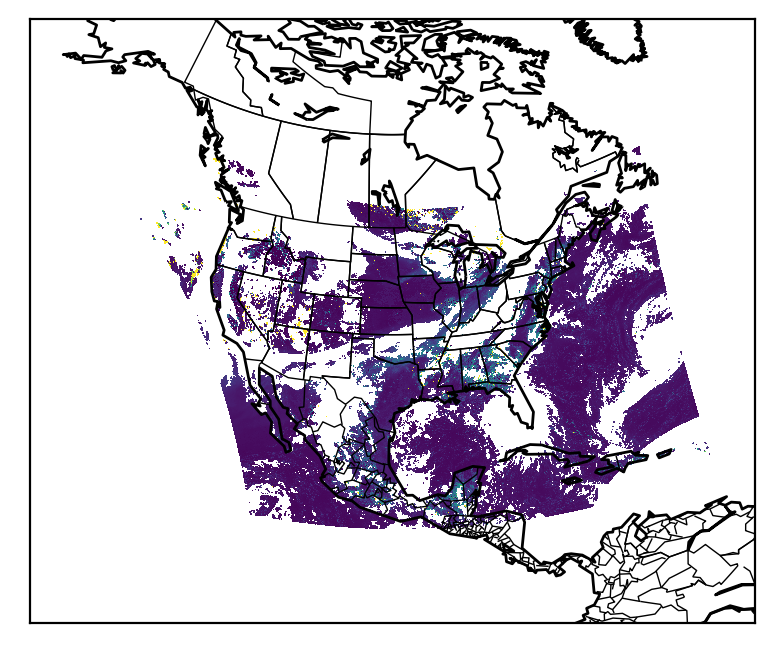

In [91]:
sat_aod.plot('AOD')